[MOT_annotator](https://github.com/jason0860907/MOT_Annotator_with_YOLO) 這個好像不能用 (只有偵測人 沒有偵測球QQ)

[VolleyVision](https://github.com/shukkkur/VolleyVision)

[Bundesliga pretrained YOLOv7 Ball Detection from Kaggle](https://www.kaggle.com/code/stpeteishii/bundesliga-pretrained-yolov7-ball-detection/output)

[How to Use the Ball Detection for YoloV7 Detection API from Roboflow](https://universe.roboflow.com/gladiatos/ball-detection-for-yolov7/model/2)

[Object Tracking](https://universe.roboflow.com/gladiatos/ball-detection-for-yolov7/model/2) 感覺之後會需要但現在可能還用不到 反正先放著

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/KateNue/VolleyVision.git

Cloning into 'VolleyVision'...
remote: Enumerating objects: 1303, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 1303 (delta 306), reused 155 (delta 155), pack-reused 973
Receiving objects: 100% (1303/1303), 940.95 MiB | 36.26 MiB/s, done.
Resolving deltas: 100% (628/628), done.
Updating files: 100% (217/217), done.


### 1. Volleyball Detection and Tracking

In [ ]:
%cd /content/VolleyVision/Stage\ I\ -\ Volleyball

/content/VolleyVision/Stage I - Volleyball


In [ ]:
# Since Colab has majority of packages installed, I am removing version specifications (numpy==0.1.2 to just numpy)
with open('requirements.txt', 'r') as file:
    lines = file.readlines()

# Extract package names without versions
package_names = [line.split('==')[0].strip() for line in lines]

# Create a new file with only package names
with open('package_names.txt', 'w') as file:
    file.write('\n'.join(package_names))

In [ ]:
!pip install -r package_names.txt
# at the end Colab will ask you to restart the runtime, please do so
# and enter the directories again (run the cell below)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 

In [ ]:
%cd /content/VolleyVision/Stage\ I\ -\ Volleyball

/content/VolleyVision/Stage I - Volleyball


In [ ]:
# download videos
!gdown 10oLUjdabE1jd0c2WpxTf1Ezgbj9t2Hhq -O ./assets/sample1.mov
!gdown 1ER2rK8jvOPT-2l6VfGhqEYaki46Zi5Nk -O ./assets/sample2.mov
!gdown 1fndpguuUTgXn3t8A_LWqP7Ylb_ElluPq -O ./assets/sample3.mov
!gdown 15zlgWmSfvBmcPAwZDKy6WWf_WULqzYRr -O ./assets/sample4.mov

Downloading...
From: https://drive.google.com/uc?id=10oLUjdabE1jd0c2WpxTf1Ezgbj9t2Hhq
To: /content/VolleyVision/Stage I - Volleyball/assets/sample1.mov
100% 1.16G/1.16G [00:18<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ER2rK8jvOPT-2l6VfGhqEYaki46Zi5Nk
To: /content/VolleyVision/Stage I - Volleyball/assets/sample2.mov
100% 321M/321M [00:05<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fndpguuUTgXn3t8A_LWqP7Ylb_ElluPq
To: /content/VolleyVision/Stage I - Volleyball/assets/sample3.mov
100% 391M/391M [00:03<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=15zlgWmSfvBmcPAwZDKy6WWf_WULqzYRr
To: /content/VolleyVision/Stage I - Volleyball/assets/sample4.mov
100% 652M/652M [00:09<00:00, 69.5MB/s]


In [ ]:
# upload local file
# 可以不用跑這個 跑上面的gdown就好

import os
from google.colab import files


def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
        for k,v in _files.items():
            path = os.path.join('assets', k)
            open(path,'wb').write(v)

getLocalFiles()

In [ ]:
!pip uninstall opencv-python
!pip install opencv-python

Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.8.0.76.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-a7aedf18.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-5b2d853e.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-402e4b05.so.59.37.100
    /usr/local/lib/py

In [ ]:
!python detect.py --input_path assets/sample1.mov --input_type video --output Output/output1.mp4 --model roboflow --marker box --color blue --confidence 0.1

loading Roboflow workspace...
loading Roboflow project...
100% 1842/1842 [19:40<00:00,  1.56it/s]
Done - 19.68 minutes


In [ ]:
!python detect.py --input_path assets/sample2.mov --input_type video --output Output/output2.mp4 --model roboflow --marker box --color blue --confidence 0.1

loading Roboflow workspace...
loading Roboflow project...
100% 510/510 [05:37<00:00,  1.51it/s]
Done - 5.63 minutes


In [ ]:
!python detect.py --input_path assets/sample3.mov --input_type video --output Output/output3.mp4 --model roboflow --marker box --color blue --confidence 0.1

loading Roboflow workspace...
loading Roboflow project...
100% 624/624 [06:16<00:00,  1.66it/s]
Done - 6.28 minutes


In [ ]:
!python detect.py --input_path assets/sample4.mov --input_type video --output Output/output4.mp4 --model roboflow --marker box --color blue --confidence 0.1

loading Roboflow workspace...
loading Roboflow project...
100% 1036/1036 [10:43<00:00,  1.61it/s]
Done - 10.73 minutes


In [ ]:
%cp ./Output/*.mp4 /content/drive/MyDrive/sample0212

In [ ]:
!python detect.py --input_path assets\rally_men.mp4 --input_type video --output_path Output/detect.mp4--model roboflow --marker circle --color yellow

usage: detect.py
       [-h]
       [--input_path INPUT_PATH]
       [--input_type {image,video}]
       [--output_path OUTPUT_PATH]
       [--model {roboflow,yolov7}]
       [--confidence CONFIDENCE]
       [--show]
       [--marker {circle,box}]
       [--color {black,white,red,green,purple,blue,yellow,cyan,gray,navy}]
       [--no_trace]
detect.py: error: unrecognized arguments: roboflow


In [ ]:
!python detect.py -h

usage: detect.py
       [-h]
       [--input_path INPUT_PATH]
       [--input_type {image,video}]
       [--output_path OUTPUT_PATH]
       [--model {roboflow,yolov7}]
       [--confidence CONFIDENCE]
       [--show]
       [--marker {circle,box}]
       [--color {black,white,red,green,purple,blue,yellow,cyan,gray,navy}]
       [--no_trace]

options:
  -h, --help
    show this
    help
    message and
    exit
  --input_path INPUT_PATH
    path to the
    video or
    image with
    volleyball
    in it
  --input_type {image,video}
    type of the
    input -
    video or
    image
  --output_path OUTPUT_PATH
    path for
    the output
    (.mp4 for
    videos and
    .jpg/.png
    for
    images),
    default new
    Output
    folder
  --model {roboflow,yolov7}
    which model
    to use for
    prediction
  --confidence CONFIDENCE
    prediction
    confidence
  --show
    watch
    preview
  --marker {circle,box}
    how to
    highlight
    the ball
  --color {black,white,red,gre

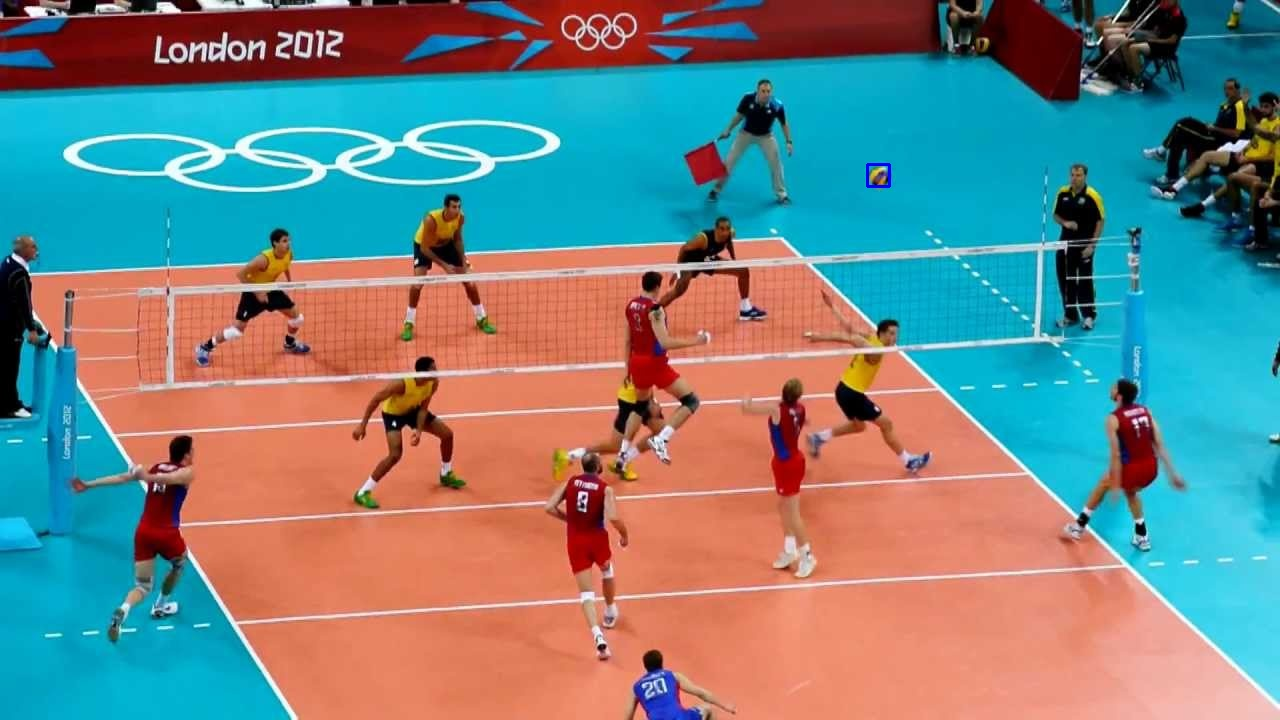

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('Output/output.jpg')
cv2_imshow(img)